In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


TFile**		test_file.root	
 TFile*		test_file.root	
  KEY: RooDataSet	ds_k;1	Ostap.Selectors/ds_1000 
  KEY: TProcessID	ProcessID0;1	4de99c20-f0e9-11e9-ba22-e368b8bcbeef
  KEY: RooDataSet	ds_pi;1	Ostap.Selectors/ds_1000 


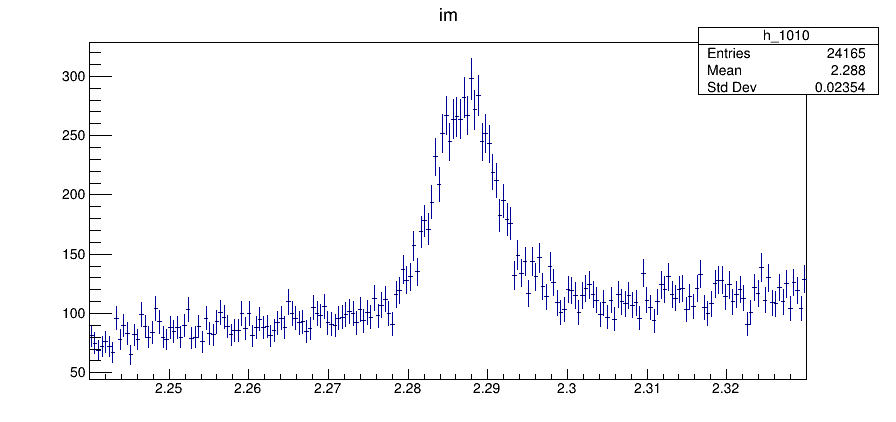

In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)
im  = ROOT.RooRealVar("im" ,"im" , 2.24, 2.33)
lgi = ROOT.RooRealVar("lgi","lgi",-2.50, 2.50)
arg_set = ROOT.RooArgSet(im, lgi)
cut = "im>2.24 && im<2.33 && lgi>-2.5 && lgi<2.5 && NNp>0.5"
rfile = ROOT.TFile("test_file.root","READ")
rfile.ls()
small_ds = rfile["ds_k"].reduce( arg_set, cut)
small_ds.draw("im")
canv.Draw()


  RooFitResult: minimized FCN value: -279452, estimated distance to minimum: 7.5894e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    1.0000e+00    2.0081e+04 +/-  1.78e+02  0.541097
                     S    1.0000e+00    4.0850e+03 +/-  1.25e+02  0.697471
              asym_sig    0.0000e+00   -5.6928e-02 +/-  5.84e-02  0.941434
              beta_sig    1.0000e+00    1.6886e+00 +/-  4.83e-01  0.936373
              mean_sig    2.2870e+00    2.2870e+00 +/-  3.29e-04  0.940776
             sigma_sig    4.5000e-03    3.5904e-03 +/-  2.36e-04  0.920577
               tau_bkg    0.0000e+00    4.3743e+00 +/-  2.77e-01  0.169228




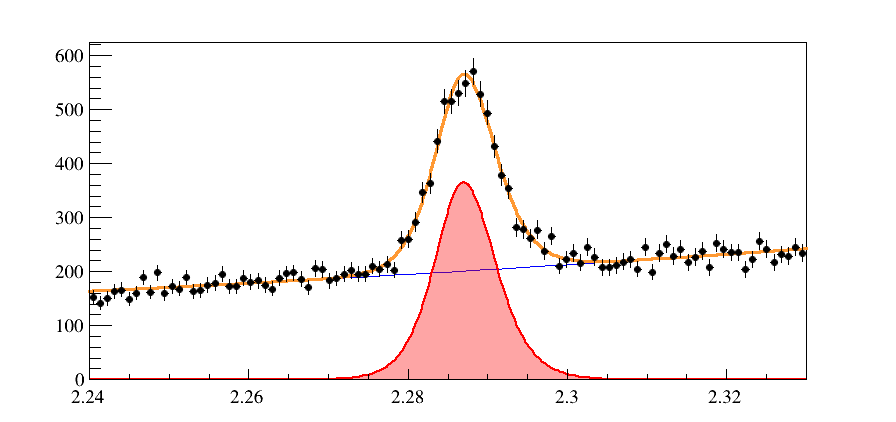

In [3]:
sig = Models.Apollonios2_pdf("sig",xvar=im,mean=(2.287,2.286,2.289),sigma=(0.0045,0.003,0.008),asymmetry=(0.,-0.1,0.1),beta=(1,0.1,20.))
bkg = Models.Bkg_pdf("bkg", xvar=im, power=0)
model = Models.Fit1D(signal=sig, background=bkg)
small_dh = small_ds.reduce(ROOT.RooArgSet(im)).binnedClone()
r,w = model.fitTo(small_dh, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()


  RooFitResult: minimized FCN value: -279452, estimated distance to minimum: 6.34972e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    2.0081e+04    2.0075e+04 +/-  1.78e+02  0.542748
                     S    4.0850e+03    4.0913e+03 +/-  1.25e+02  0.698640
              asym_sig   -5.6928e-02   -5.9170e-02 +/-  5.55e-02  0.932651
              beta_sig    1.6886e+00    1.6176e+00 +/-  4.41e-01  0.937523
              mean_sig    2.2870e+00    2.2870e+00 +/-  3.05e-04  0.931857
             sigma_sig    3.5904e-03    3.5555e-03 +/-  2.37e-04  0.922155
               tau_bkg    4.3743e+00    4.3776e+00 +/-  2.77e-01  0.168894




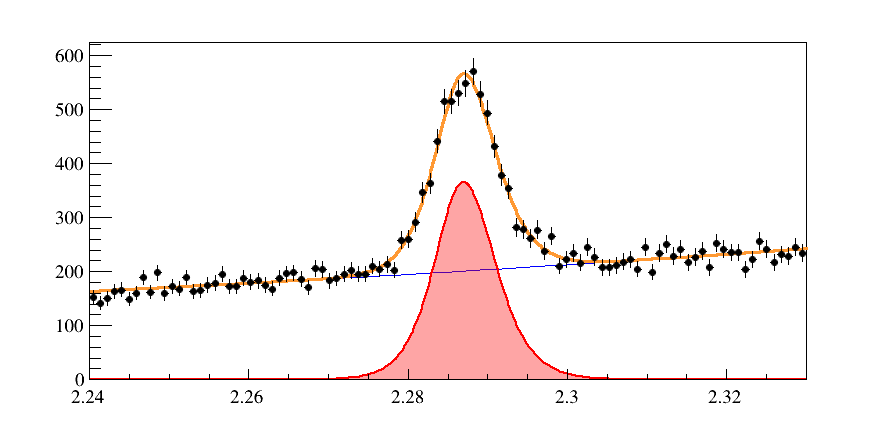

In [4]:
r,w = model.fitTo(small_ds, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

In [5]:
print(small_ds)
Nev = len(small_ds)

+---------------+---------------+----------+----------+---------+--------+
|   Variable    |  Description  |   mean   |   rms    |   min   |  max   |
+---------------+---------------+----------+----------+---------+--------+
| 1. im         | im            |  +2.2879 | 0.025437 |   +2.24 | +2.33  |
| 2. lgi        | lgi           | +0.74469 | 0.59702  | -2.4785 | +2.472 |
+---------------+---------------+----------+----------+---------+--------+


In [6]:
print(small_ds[1])
print(small_ds[1]["im"])
print(small_ds[1]["im"].value)
print(r("sigma_sig")[0].value())
SigmaMain = 1000.*r("sigma_sig")[0].value()

('im:2.2692790031433105', 'lgi:1.3636105885471335')
'im' : ( 2.26928 +- 0 ) 
2.2692790031433105
0.0035554673381941165


0	3.6420805355875503


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 


10	3.2109575127067718


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 


20	3.2030495183170333


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 


30	3.8905299540176115


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 


40	3.5793755841261703


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 


50	4.025039927282392


# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 


60	3.5930418108571986


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 


70	3.3784003675310696


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 


80	3.6714099560415434


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 


90	3.6708396986408816


# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(Fitsig)                    WARNING fitTo: Fit status is  4/Reached call limit 
# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 


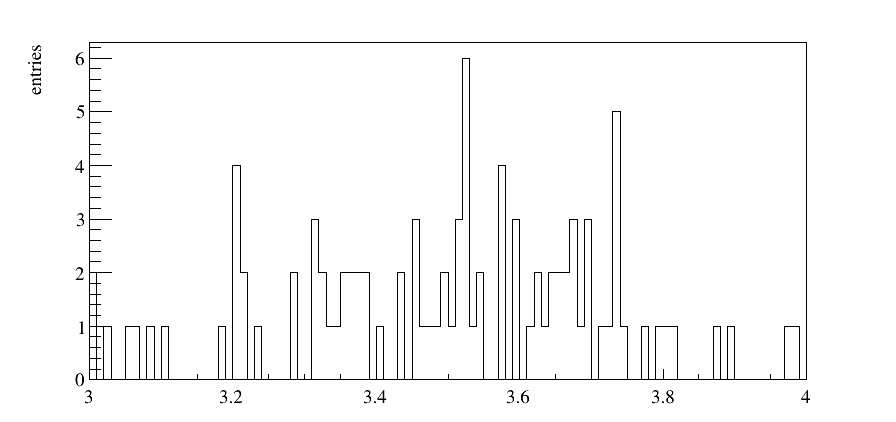

In [8]:
h_sigma = ROOT.TH1F("h_sigma",";#sigma, MeV;entries",100,3,4)
B=100
argset = ROOT.RooArgSet( im )
dsb = ROOT.RooDataSet("dsb","bootstrap ds", argset)
for b in range(B):
    dsb.reset()
    for jj in range(Nev):
        im.setVal( small_ds[ROOT.gRandom.Integer(Nev)]["im"].value )
        dsb.add( argset )
    #print(dsb.statVar("im"))
    r,w = model.fitTo(dsb, draw=False, silent=True)
    if not b%10:
        print(str(b)+"\t"+str(1000.*r("sigma_sig")[0].value()))
    #print(r)
    h_sigma.Fill(1000.*r("sigma_sig")[0].value())
h_sigma.Draw()
canv.Draw()

In [10]:
h_sigma.mean()-SigmaMain

( -0.0580655 +- 0.0224126 )

In [12]:
h_sigma.rms()

( 0.219598 +- 0.0144101 )

In [13]:
h_sigma.mean()

( 3.4974 +- 0.0224126 )

In [14]:
SigmaMain

3.5554673381941164

In [15]:
Nev

24166

In [16]:
print(r("sigma_sig"))

(( 0.00351545 +- 0.00023462 ), 'sigma_sig' : ( 0.00351545 +- 0.00023462 ) )
